# Quadratic Equation

In [1]:
import numpy as np
import math

## The quadratic formula says that the roots of 
$ ax^2 + bx + c = 0 $

## are given by

$ x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $

### So what happens if we set the value of b to be much larger than 4ac?

Here we set:
a = 1, b = 10^8, c = 1

In [2]:
from math import sqrt

def quadratic(a, b, c):
    r = sqrt(b**2 - 4*a*c)
    x1 = ((-b + r)/(2*a))
    x2 = ((-b - r)/(2*a))
    return x1, x2

print(quadratic(1, 1e8, 1))

(-7.450580596923828e-09, -100000000.0)


In [3]:
coeff = [1, 1e8, 1]
np.roots(coeff)

array([-1.e+08, -1.e-08])

### Upon comparison to the values obtained from np.roots, the first root is wrong, while the second one is correct.
This is because the more similar two numbers are, the more precision you can lose from subtracting them. 

### In this case $ \sqrt{b^2 - 4ac} $ is very nearly equal to b

## Improving our precision by using the second equation in the lecture notes:

In [4]:
def quadratic_prime(a, b, c):
    r = sqrt(b**2 - 4*a*c)
    x1 = 2*c/(-b - r)
    x2 = 2*c/(-b+r)
    return (x1, x2)

print(quadratic_prime(1, 1e8, 1))

(-1e-08, -134217728.0)


### We now notice that it gives the right answer to the first root, however now our second root is wrong.
This is because of the same reason that we subtracted two nearly equal numbers.

### We learn that the first version of the quadratic formula computes the larger root correctly, while the second version computes the smaller root correctly.

### Investigating how errors in the computed answers become large as the subtractive cancellation increases

To test we will utilize the following parameters:
a = 1
b = 1
c = 10^-n (n = 1,2,3, ...)

In [5]:
def quadratic_test(c):
    a = 1
    b = 1
    r = sqrt(b**2 - 4*a*c)
    firstroot.append((-b + r)/(2*a))
    secondroot.append((-b - r)/(2*a))

In [6]:
firstroot = []
secondroot = []
c = []
for i in range(1,21):
    c.append(10**-i)

for i in c:
    quadratic_test(i)

normalqeroots = list(zip(firstroot, secondroot))
normalqeroots

[(-0.1127016653792583, -0.8872983346207417),
 (-0.010102051443364402, -0.9898979485566356),
 (-0.0010010020050140178, -0.998998997994986),
 (-0.00010001000200049459, -0.9998999899979994),
 (-1.0000100002016676e-05, -0.9999899998999979),
 (-1.000001000006634e-06, -0.999998999999),
 (-1.0000000999488279e-07, -0.99999989999999),
 (-1.0000000105758744e-08, -0.9999999899999998),
 (-1.0000000272292198e-09, -0.9999999989999999),
 (-1.000000082740371e-10, -0.9999999999),
 (-1.000000082740371e-11, -0.99999999999),
 (-1.0000333894311098e-12, -0.9999999999989999),
 (-1.000310945187266e-13, -0.9999999999999),
 (-9.992007221626409e-15, -0.99999999999999),
 (-9.992007221626409e-16, -0.999999999999999),
 (-1.1102230246251565e-16, -0.9999999999999999),
 (0.0, -1.0),
 (0.0, -1.0),
 (0.0, -1.0),
 (0.0, -1.0)]

In [7]:
firstrootprime = []
secondrootprime = []

def quadratic_prime_test(c):
    a = 1 
    b = 1
    r = sqrt(b**2 - 4*a*c)
    firstrootprime.append((2*c)/(-b - r))
    secondrootprime.append((2*c)/(-b+r))

In [8]:
c_prime = []

for i in range(1,11):
    c_prime.append(10**-i)

for i in c_prime:
    quadratic_prime_test(i)

primeqeroots = list(zip(firstrootprime, secondrootprime))
primeqeroots

[(-0.11270166537925831, -0.8872983346207418),
 (-0.01010205144336438, -0.9898979485566336),
 (-0.001001002005014042, -0.9989989979950102),
 (-0.00010001000200050015, -0.9998999899980551),
 (-1.000010000200005e-05, -0.9999899998983355),
 (-1.000001000002e-06, -0.999998999994366),
 (-1.00000010000002e-07, -0.9999999000511821),
 (-1.0000000100000004e-08, -0.9999999894241257),
 (-1.0000000010000002e-09, -0.999999972770781),
 (-1.0000000001000001e-10, -0.9999999172596359)]

### Using the product of roots, we can calculate for x1 using the equation:

$ x_1 = \frac{c}{ax_2} $

### So that we no longer need to use the second equation to calculate for the smaller root.

In [9]:
def quadratic_precise(b):
    a = 1
    c = 1
    r = sqrt(b**2 - 4*a*c)
    x2 = ((-b - r)/(2*a))
    x1 = (c/(a*x2))
    return x2, x1

In [10]:
quadratic_precise(1e8)

(-100000000.0, -1e-08)

### We have now obtained the exact roots of the equation

# Summing Series with Alternating Signs

### Creating a double-precision function that calculates the three series

In [11]:
def SN1(n):
    terms = []
    for n in range(1, 2*n + 1 ):
        val = (-1)**n * n / (n+1)
        terms.append(val)
    return sum(terms)

def SN2(n):
    terms = []
    for n in range(1, n + 1):
        val = (2*n) / (2* n + 1) - (2*n - 1) / (2 * n)
        terms.append(val)
    return sum(terms)

def SN3(n):
    terms = []
    for n in range(1, n + 1):
        val = 1 / (2 * n * (2 * n + 1))
        terms.append(val)
    return sum(terms)

### Plotting the relative error vs. the number of terms, assuming that SN3 is the exact answer

In [12]:
x = range(1, 1000000)
y = []
for n in x:
    val = (SN1(n) - SN3(n)) / (SN3(n))
    y.append(abs(val))

In [13]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Relative Error')

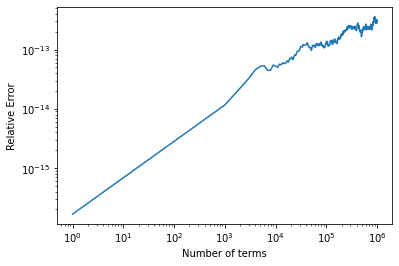

In [14]:
plt.loglog(x, y)
plt.xlabel('Number of terms')
plt.ylabel('Relative Error')